In [1]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

We first read the data in.

In [6]:
housing_data <- read_csv("data/HouseListings-Top45Cities-10292023-kaggle.csv")

Rows: 35768 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): City, Address, Province
dbl (7): Price, Number_Beds, Number_Baths, Population, Latitude, Longitude, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


We then want to see what cities are included in this data frame.

In [7]:
housing_data |>
distinct(City)

City
<chr>
Toronto
Vancouver
Calgary
Edmonton
Ottawa
Winnipeg
Hamilton
Kitchener
London


Since there are too many cities in this data frame, and we are not planning to do analysis for all of them, we decided to solve the imbalance data problem at this point by picking the top 5 cities that have the most rows in this data frame.

In [9]:
data_arrange <- housing_data|>
                group_by(City)|>
                summarize(count= n())|>
                arrange(desc(count))
top_5 <- slice(data_arrange, 1:5)
top_5 <- c("Regina", "Saskatoon", "Edmonton", "London", "New Westminster")

We picked the five cities that this data frame have the most rows, so we have enough information to feed our classifer and regression model later on.

In [10]:
housing_data |>
distinct(Number_Beds)

Number_Beds
<dbl>
3
2
4
1
0
6
5
7
8


In [11]:
num_beds<- housing_data|>
           filter(City %in% top_5)|>
           select(City, Number_Beds)|>
           group_by(City)|>
           summarize(Number_Beds = sum(Number_Beds))
num_beds

City,Number_Beds
<chr>,<dbl>
Edmonton,4104
London,4865
New Westminster,3971
Regina,6047
Saskatoon,5925


Now, we got the total number of beds showed up on the market, and we can thus visualize the amount comparisons.

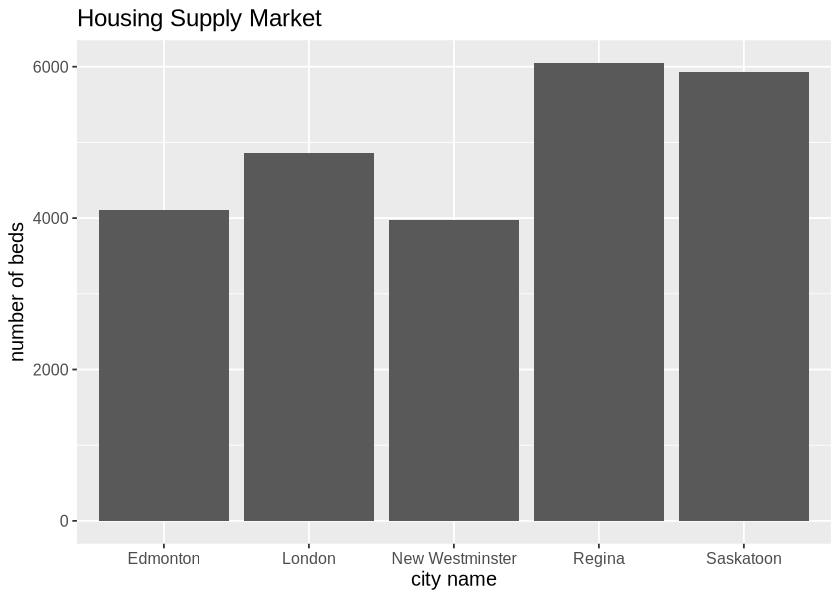

In [22]:
options(repr.plot.height = 5, repr.plot.width = 7)
beds_bar <- num_beds|>
            ggplot(aes(x = City, y = Number_Beds))+
            geom_bar(stat = "identity")+
            labs(x = "city name", y = "number of beds")+
            ggtitle("Housing Supply Market")+
            theme(text = element_text(size = 12))
beds_bar

By this graph, we can see that regina has the most bedrooms available on market among the top five cities.